In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('install.csv')
print("Data imported")

Data imported


In [3]:
data.shape

(10841, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

1.9 is an invalid entry here with 1 occurence

In [6]:
#deleting invalid Category
#df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
data.sort_values(by = ['Category'], ascending = True)
data = data.drop(data[data['Category']== '1.9'].index) 
print('1.9 removed')
data['Category'].value_counts()
#df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)

1.9 removed


FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [7]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

Free is an outlier. + is a character to be removed

In [8]:
#data.sort_values(by = ['Installs'])
#data.drop(data[data['Category']== '1.9'].index)
data[data['Installs']=='Free'] 
#Free is removed by removing 1.9 from Category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [9]:
#Remove '+' from 'Number of Installs' to make it numeric
#data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '')) # works 
data['Installs'] = data['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x) # safer

#Remove , to convert Installs into int
data['Installs'] = data['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

#Convert Installs into int
data['Installs'] = data['Installs'].apply(lambda x: int(x))
data['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [10]:
data['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.6      25
2.7      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

19.0 is an outlier

In [11]:
data[data['Rating']== 19.0]
#19.0 is removed by removing 1.9 from Category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [12]:
data['Reviews'].value_counts()

0          596
1          272
2          214
3          175
4          137
5          108
6           97
7           90
8           74
9           65
10          64
12          60
11          52
13          49
17          48
19          41
14          41
20          35
21          35
16          35
15          31
24          30
25          30
30          30
38          29
18          27
22          26
27          25
23          25
28          24
          ... 
23671        1
221722       1
17240        1
31804        1
294701       1
182173       1
111632       1
1522         1
51543        1
1300619      1
139480       1
820          1
2223         1
718          1
3874         1
19212        1
313633       1
520654       1
5785         1
655067       1
620534       1
6208         1
4972230      1
29462        1
1873516      1
91171        1
96028        1
87919        1
244567       1
421000       1
Name: Reviews, Length: 6001, dtype: int64

In [13]:
data['Reviews'] = data['Reviews'].apply(lambda x: float(x))

In [14]:
data['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
                      ... 
144k                     1
920k                     1
994k                     1
837k                     1
629k                     1
902k                     1
6

convert kb to M

In [15]:
#data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', 'M')) / 1000 if 'k' in str(x) else x)
#won't work as M is not a float value

data['Size'] = data['Size'].apply(lambda x: x.replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.replace('M','') if 'M' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: x.replace(',','') if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
data['Size'] = data['Size'].apply(lambda x: float(x))
data['Size'].value_counts()

11.000    198
12.000    196
14.000    194
13.000    191
15.000    184
17.000    160
19.000    154
16.000    149
26.000    149
10.000    146
25.000    143
20.000    139
21.000    138
24.000    136
18.000    133
23.000    117
22.000    114
29.000    103
27.000     97
28.000     95
30.000     84
33.000     79
3.300      77
37.000     76
35.000     72
31.000     70
2.900      69
2.500      68
2.300      68
2.800      65
         ... 
0.175       1
0.414       1
0.511       1
0.437       1
0.728       1
0.270       1
0.161       1
0.600       1
0.034       1
0.498       1
0.818       1
0.992       1
0.951       1
0.458       1
0.545       1
0.459       1
0.976       1
0.116       1
0.351       1
0.186       1
0.232       1
0.153       1
0.253       1
0.313       1
0.210       1
0.027       1
0.642       1
0.647       1
0.039       1
0.942       1
Name: Size, Length: 459, dtype: int64

In [16]:
data['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

0 is an outlier here

In [17]:
data[data['Type']== 0]
#0 is removed by removing 1.9 from Category

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [18]:
data['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
$3.99         63
$1.49         46
$5.99         30
$2.49         26
$9.99         21
$6.99         13
$399.99       12
$14.99        11
$4.49          9
$7.99          7
$29.99         7
$3.49          7
$24.99         7
$5.49          6
$19.99         6
$11.99         5
$6.49          5
$8.99          5
$12.99         5
$1.00          3
$2.00          3
$16.99         3
$10.00         3
$9.00          2
$1.70          2
           ...  
$4.84          1
$2.59          1
$394.99        1
$3.90          1
$89.99         1
$3.08          1
$1.29          1
$30.99         1
$3.88          1
$400.00        1
$154.99        1
$3.28          1
$1.75          1
$299.99        1
$200.00        1
$1.59          1
$1.97          1
$5.00          1
$1.20          1
$74.99         1
$389.99        1
$1.76          1
$4.80          1
$4.59          1
$2.50          1
$37.99         1
$18.99         1
$2.95         

In [19]:
data['Price'] = data['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
data['Price'] = data['Price'].apply(lambda x: float(x))
data['Price'].value_counts()

0.00      10040
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
7.99          7
3.49          7
5.49          6
19.99         6
12.99         5
8.99          5
6.49          5
11.99         5
16.99         3
10.00         3
1.00          3
2.00          3
39.99         2
10.99         2
          ...  
46.99         1
2.90          1
379.99        1
4.80          1
19.90         1
74.99         1
15.46         1
4.59          1
30.99         1
109.99        1
200.00        1
1.96          1
15.99         1
18.99         1
4.85          1
3.90          1
28.99         1
2.95          1
37.99         1
3.28          1
4.29          1
19.40         1
400.00        1
299.99        1
154.99        1
1.20          1
1.59          1
2.56          1
1.61          1
1.04          1
Name: Price, Length: 92,

In [20]:
data['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [21]:
data['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

In [22]:
data['Last Updated'].value_counts()     

August 3, 2018       326
August 2, 2018       304
July 31, 2018        294
August 1, 2018       285
July 30, 2018        211
July 25, 2018        164
July 26, 2018        161
August 6, 2018       158
July 27, 2018        151
July 24, 2018        148
July 23, 2018        127
July 19, 2018        126
July 16, 2018        126
July 18, 2018        123
July 11, 2018        106
August 4, 2018       105
July 12, 2018        103
July 5, 2018          93
July 17, 2018         92
July 3, 2018          90
July 9, 2018          89
July 20, 2018         88
July 13, 2018         81
May 24, 2018          69
June 27, 2018         63
July 6, 2018          63
June 26, 2018         60
June 25, 2018         56
May 25, 2018          56
June 13, 2018         54
                    ... 
August 28, 2016        1
April 2, 2017          1
September 8, 2013      1
December 29, 2014      1
July 6, 2014           1
February 16, 2014      1
October 18, 2014       1
April 26, 2015         1
April 15, 2016         1


In [23]:
data['Current Ver'].value_counts()   

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
1.0.2                   80
1.6                     65
1.0.3                   62
2.1                     61
3.0                     59
1.0.4                   58
1.7                     53
2.0.0                   51
1.0.5                   50
1.1.0                   49
1.1.1                   48
1.0.6                   47
1.2.1                   46
1.2.0                   43
1.8                     42
4.0                     40
1.9                     37
2.3.2                   35
1.0.7                   34
2.4                     34
                      ... 
3.2.258b ae1da5165       1
2.0.075                  1
2.0.13                   1
1.9.3901                 1
3.3.85 (2)               1
1.23.0                   1
5

airConditionerMaintenance_13112015, v2.7.10.6 are outliers

In [24]:
data[data['Current Ver'] == 'airConditionerMaintenance_13112015']
data = data.drop(data[data['Current Ver'] == 'airConditionerMaintenance_13112015'].index)

In [25]:
data[data['Current Ver'] == 'airConditionerMaintenance_13112015']
print('Current Ver = airConditionerMaintenance_13112015 is dropped')

Current Ver = airConditionerMaintenance_13112015 is dropped


In [26]:
data['Current Ver'] = data['Current Ver'].apply(lambda x: x.replace('Varies with device','NaN') if 'Varies with device' in str(x) else x)
#data['Current Ver'] = data['Current Ver'].apply(lambda x: float(x)

data['Current Ver'].value_counts()

NaN                   1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
1.3                    145
1.0.0                  136
1.0.1                  119
1.4                     88
1.5                     81
1.0.2                   80
1.6                     65
1.0.3                   62
2.1                     61
3.0                     59
1.0.4                   58
1.7                     53
2.0.0                   51
1.0.5                   50
1.1.0                   49
1.1.1                   48
1.0.6                   47
1.2.1                   46
1.2.0                   43
1.8                     42
4.0                     40
1.9                     37
2.3.2                   35
1.0.7                   34
2.4                     34
                      ... 
v6.6.0                   1
5.4.8                    1
3.2.258b ae1da5165       1
2.0.075                  1
2.0.13                   1
1.9.3901                 1
3

In [27]:
data['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           280
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
4.0.3 - 7.1.1            2
5.0 - 8.0                2
2.2 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

4.4W and up is an outlier,  4.0.3 - 7.1.1 also needs cleaning

In [28]:
#missing data
total = data.isnull().sum().sort_values(ascending = False)
#print(total)
percent = ((data.isnull().sum())/(data.count())).sort_values(ascending = False)
#print(percent)
missing_data = pd.concat([total, percent],axis = 1, keys = ['Total', 'Percent']) #.sort_values(ascending = False)
missing_data

,Total,Percent
Size,1695,0.185367
Rating,1474,0.157395
Current Ver,8,0.000739
Android Ver,2,0.000185
Type,1,0.000092
Last Updated,0,0.000000
Genres,0,0.000000
Content Rating,0,0.000000
Price,0,0.000000
Installs,0,0.000000


In [29]:
data['App'].nunique()

9658

In [30]:
data['App'].count()

10839

9658 of 10839 are unique. This means we have duplicates.  
Let's hunt for duplicates using #data.duplicated(subset='App', keep='first') 
This doesn't seems to work.  
So we'll drop them straight away

In [31]:
data.drop_duplicates(subset = 'App', keep = 'first', inplace = True )
#DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
print('Duplicates dropped')

Duplicates dropped


In [32]:
data.shape

(9658, 13)

In [33]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 13 columns):
App               9658 non-null object
Category          9658 non-null object
Rating            8195 non-null float64
Reviews           9658 non-null float64
Size              8431 non-null float64
Installs          9658 non-null int64
Type              9657 non-null object
Price             9658 non-null float64
Content Rating    9658 non-null object
Genres            9658 non-null object
Last Updated      9658 non-null object
Current Ver       9650 non-null object
Android Ver       9656 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.0+ MB


In [35]:
#Removing Redundant Signs from App Names
import re
data['App'] = data['App'].map(lambda x: re.sub(r"[^\w\s]", "", x.title())) # Capitalize every word
data['App'].head()

0         Photo Editor  Candy Camera  Grid  Scrapbook
1                                 Coloring Book Moana
2    U Launcher Lite  Free Live Cool Themes Hide Apps
3                                 Sketch  Draw  Paint
4                Pixel Draw  Number Art Coloring Book
Name: App, dtype: object

Text(0.5,1,'Category Frequency')

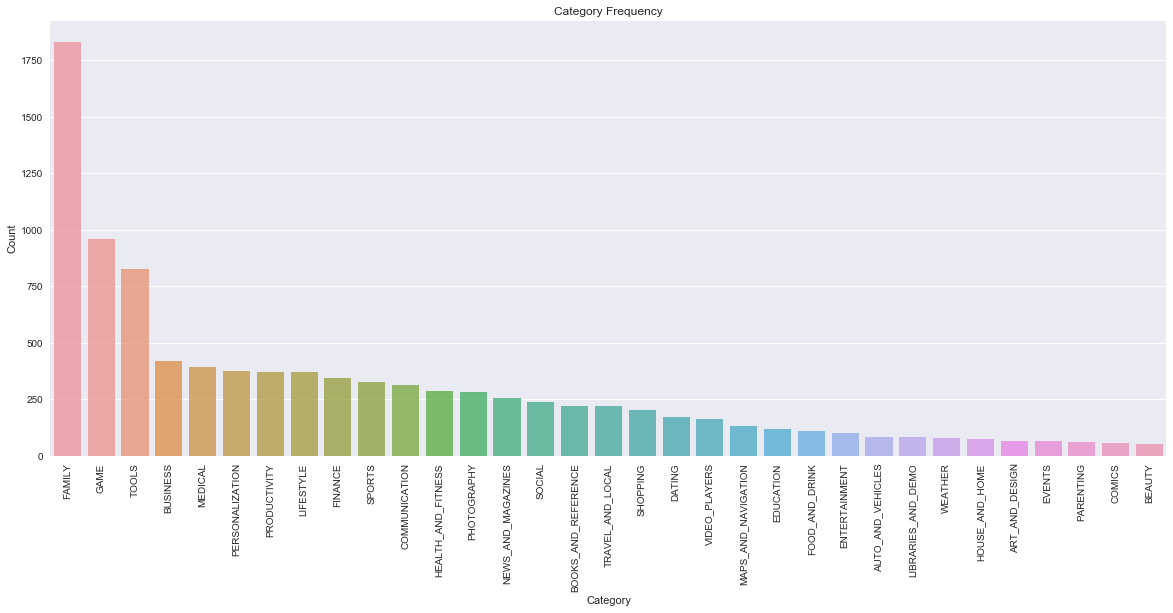

In [36]:
#data['Category'].barplot() #doesn't works
category_counts = data['Category'].value_counts()
plt.figure(figsize = (20,8))
sns.barplot(category_counts.index, category_counts.values, alpha = 0.8)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 90)   
plt.title('Category Frequency')
#category_counts

In [37]:
data['Rating'].describe()

count    8195.000000
mean        4.173264
std         0.536654
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5,1,'Rating Frequency')

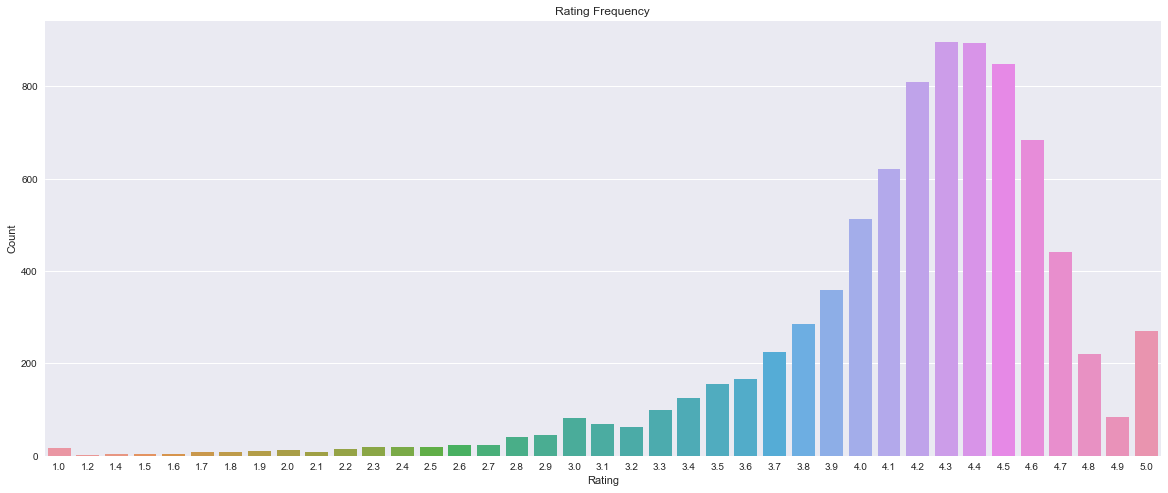

In [38]:
rating_count = data['Rating'].value_counts()
plt.figure(figsize = (20,8))
sns.barplot(rating_count.index, rating_count.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Frequency')
#rating_count

Text(0.5,1,'Mean rating for Categories')

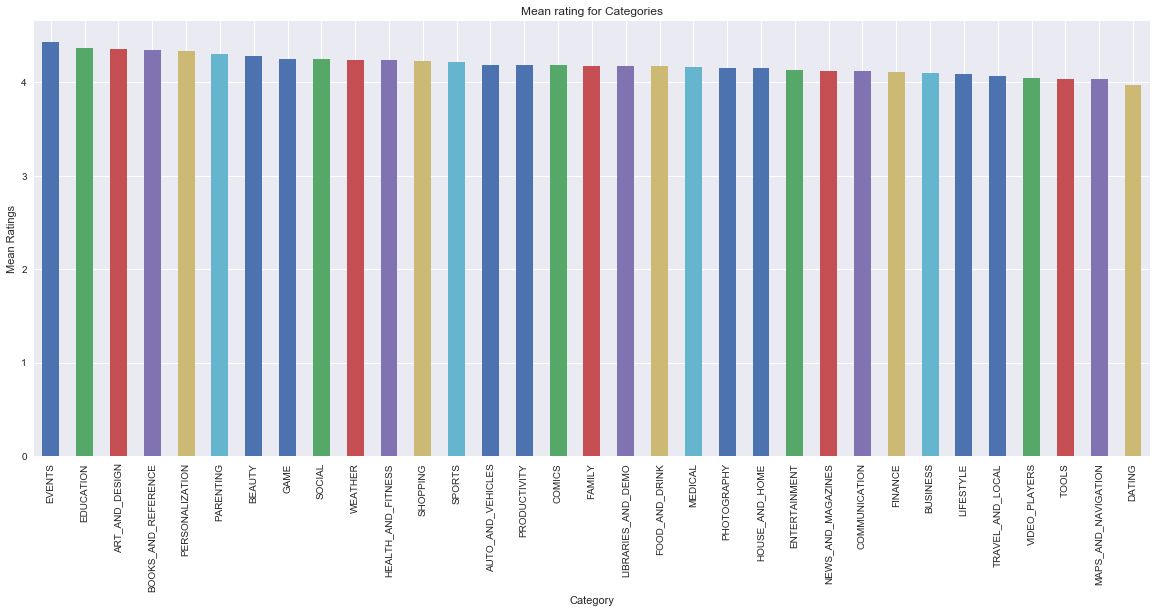

In [39]:
plt.figure(figsize = (20,8))
data.groupby( by = ['Category'])['Rating'].agg('mean').sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Mean Ratings')
plt.title('Mean rating for Categories')
#sns.barplot

Text(0.5,1,'Reviews by Category')

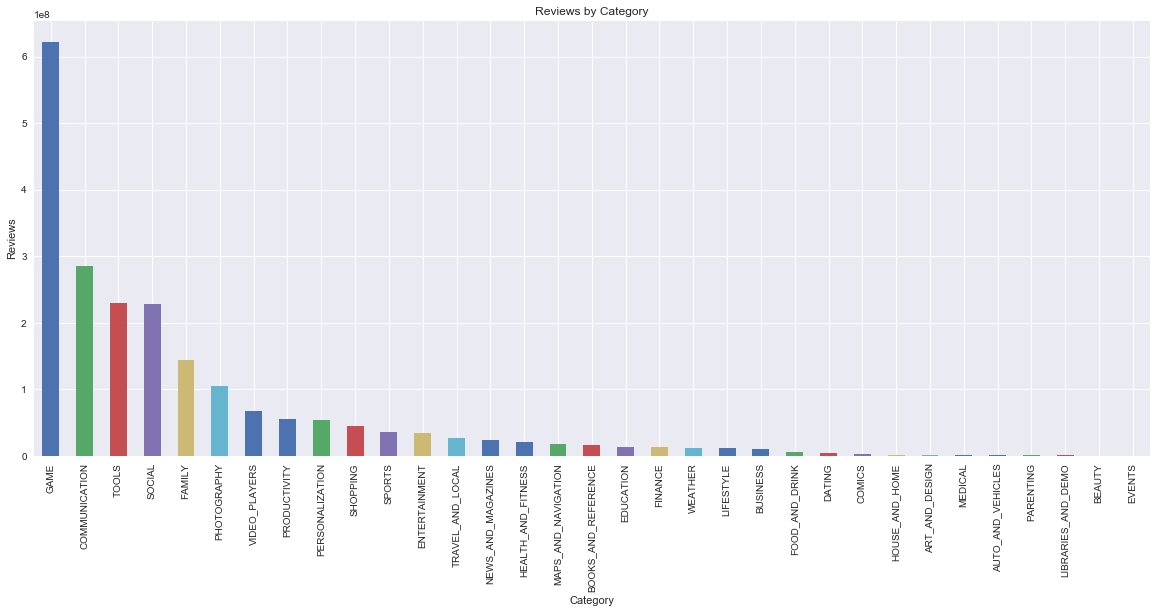

In [40]:
plt.figure(figsize = (20,8))
data.groupby(by = ['Category'])['Reviews'].agg('sum').sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.title('Reviews by Category')

In [41]:
data['Installs'].describe()

count    9.658000e+03
mean     7.778312e+06
std      5.376100e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\dhruv.aggarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


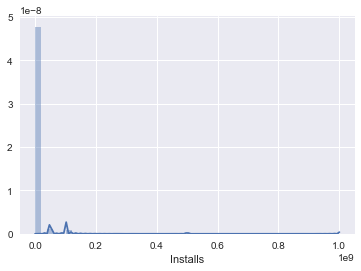

In [42]:
#type(data['Installs'])
sns.distplot(data['Installs'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

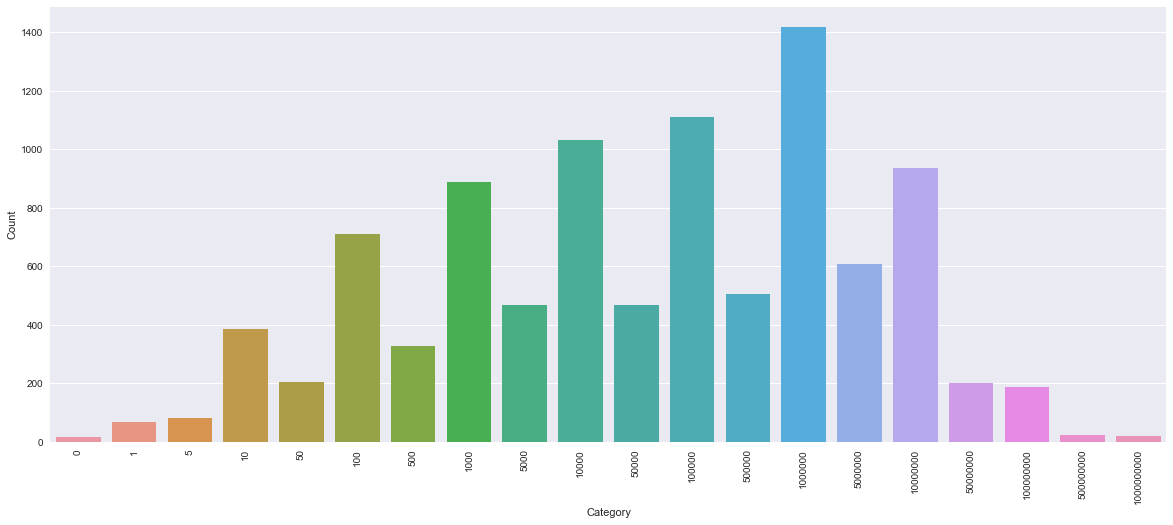

In [43]:
installs_count = data['Installs'].value_counts()
plt.figure(figsize = (20,8))
sns.barplot(installs_count.index, installs_count.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 90)

There are very few apps with such heavy installs

Let's finds out the correlation among various feaures

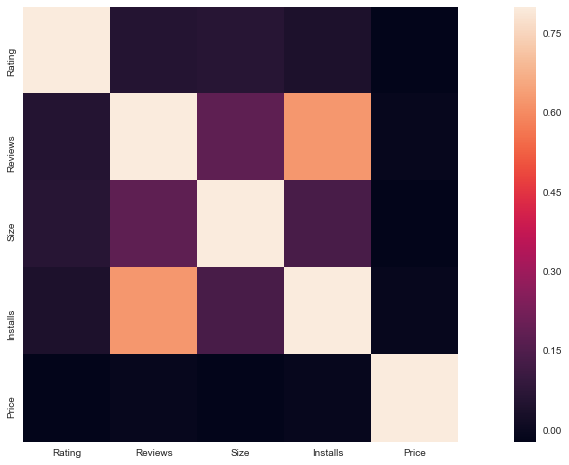

In [46]:
#Correlation Matrix
corrmat = data.corr()
f,ax = plt.subplots(figsize = (20,8))
sns.heatmap(corrmat, vmax = 0.8, square =True )

This shows that Installs has a high coorrelation with Reviews. Meaning good reviews appreciate others to install an app
Let's check this using a scatter plot

In [56]:
data['Reviews'].describe()

count    9.658000e+03
mean     2.166150e+05
std      1.831413e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

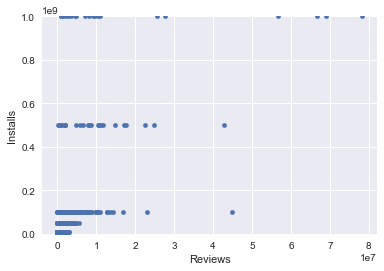

In [55]:
#plt.figure(figsize = (20,8))
#f,ax = plt.subplots(figsize = (20,8))
var = 'Reviews'
pd.concat([data['Installs'],data[var]],axis = 1)
data.plot.scatter(x = var, y = 'Installs', ylim = (0,1000000000))

Text(0.5,1,'Category wise installs')

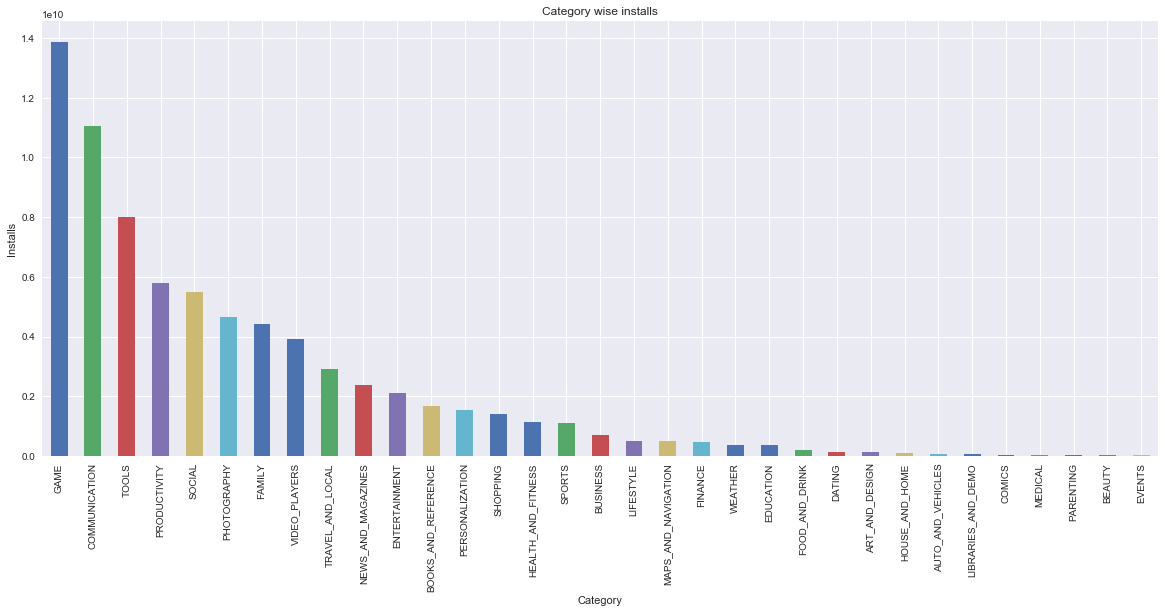

In [48]:
plt.figure(figsize = (20,8))
data.groupby(by =['Category'])['Installs'].agg('sum').sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Category')
plt.ylabel('Installs')
plt.title('Category wise installs')